In [ ]:
import spacy
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dfComment = pd.read_csv("/content/train.csv")

In [ ]:
dfComment.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
dfComment.drop(['severe_toxic', 'threat'] ,axis=1,inplace = True)
dfComment

,id,comment_text,toxic,obscene,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0
...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0


In [ ]:
dfComment['emotion'] = dfComment[['toxic','obscene','insult','identity_hate']].astype(str).apply(lambda x: ''.join(x), axis=1)

In [ ]:
def valToDecimal(x):
    return int(x,2)

In [ ]:
dfComment['emotion'] = dfComment['emotion'].apply(valToDecimal)

In [ ]:
dfComment[dfComment['toxic']==1]

,id,comment_text,toxic,obscene,insult,identity_hate,emotion
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,14
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,8
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,8
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,1,1,1,15
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,1,1,0,14
...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,1,1,1,15
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,1,0,10
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,1,1,0,14
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,1,0,10


In [ ]:
dfComment.drop(['id','toxic', 'obscene','insult','identity_hate'],axis=1,inplace = True)
''' dfComment['emotion'] = dfComment['emotion'].apply(lambda x: 1 if x != 0 else x) '''

" dfComment['emotion'] = dfComment['emotion'].apply(lambda x: 1 if x != 0 else x) "

In [ ]:
dfComment[dfComment['emotion']==0]

,comment_text,emotion
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [ ]:
dfComment['emotion'].value_counts()

0     143368
8       5831
14      4984
12      1931
10      1246
15       970
4        319
2        304
6        183
9        147
11       144
1         54
13        41
3         28
7         18
5          3
Name: emotion, dtype: int64

In [ ]:
newDf = dfComment.drop(dfComment[dfComment['emotion'] == 0][:120000].index)
newDf['emotion'].value_counts()

0     23368
8      5831
14     4984
12     1931
10     1246
15      970
4       319
2       304
6       183
9       147
11      144
1        54
13       41
3        28
7        18
5         3
Name: emotion, dtype: int64

In [ ]:
newDf['emotion'] = newDf['emotion'].apply(lambda x: 1 if x != 0 else x)
newDf['emotion'].value_counts()

0    23368
1    16203
Name: emotion, dtype: int64

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def treat_comment(comment):
    spacy_comment = nlp(comment, disable=["parser", "tagger", "ner", "textcat"])
    treated_tokens = [w.text for w in spacy_comment if w.is_alpha and not w.is_stop]
    return " ".join(treated_tokens)

In [ ]:
newDf['comment_text'] = newDf['comment_text'].apply(treat_comment)

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
newDf

,comment_text,emotion
6,COCKSUCKER PISS WORK,1
12,Hey talk exclusive group WP TALIBANS good dest...,1
16,Bye look come think comming Tosser,1
42,gay antisemmitian Archangel WHite Tiger Meow G...,1
43,FUCK FILTHY MOTHER ASS DRY,1
...,...,...
159566,second time asking view completely contradicts...,0
159567,ashamed horrible thing talk page,0
159568,Spitzer Umm s actual article prostitution ring...,0
159569,looks like actually speedy version deleted look,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

label = newDf['emotion']
features = newDf['comment_text']
X = vectorizer.fit_transform(features)
Y = label
print(X.shape)

(29571, 55029)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
print(X_train.shape)

(22178, 55029)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model.score(X_train, Y_train)

0.9434123906574082

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
accuracy_score(Y_test, y_pred)

0.8847558501284999

<Axes: >

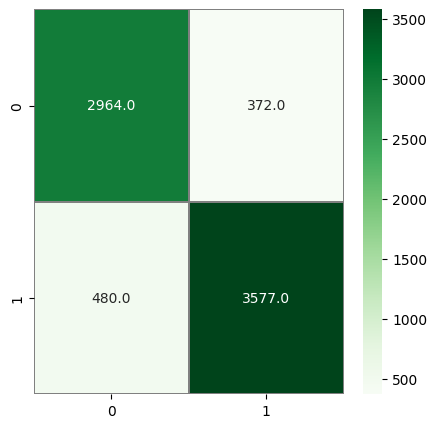

In [ ]:
import matplotlib.pyplot as plt


matrix = confusion_matrix(Y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(matrix, annot=True, linewidths=0.01, cmap='Greens', linecolor="gray", fmt='.1f', ax=ax)

In [ ]:
 from sklearn.ensemble import GradientBoostingClassifier
 from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Créer un modèle DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# Adapter (entraîner) le modèle aux données d'entraînement
model2.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
model2.score(X_train, Y_train)

0.9992785643430426

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
accuracy_score(Y_test, y_pred)

0.8283511429730827

<Axes: >

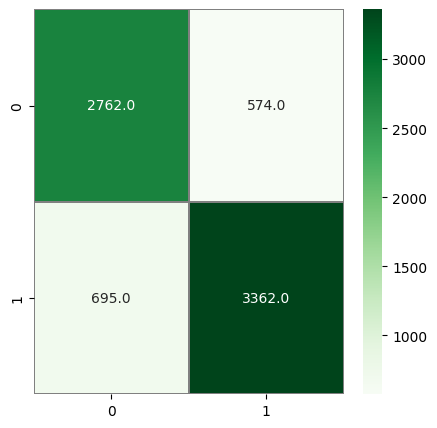

In [ ]:
matrix = confusion_matrix(Y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(matrix, annot=True, linewidths=0.01, cmap='Greens', linecolor="gray", fmt='.1f', ax=ax)


In [ ]:
import joblib as jb
jb.dump(model, "mon_modele_test2.pkl")


['mon_modele_test2.pkl']

In [ ]:
jb.dump(vectorizer, "mon_vecteur_test2.pkl")

['mon_vecteur_test2.pkl']

In [ ]:
import nltk
jb.__version__

'1.3.2'